In [1]:
import pandas as pd

# Load dataset
df = pd.read_csv(r"C:\Users\Deep\OneDrive\Desktop\CmDZeN\zenui\model\leetcode_questions.csv")

# Fix 'Complexity (%)' column
df['Complexity (%)'] = df['Complexity (%)'].astype(str).str.replace('%', '').astype(float)

# Improved subject selection
topics = df['Subject'].unique()
print("Available topics:")
for i, t in enumerate(topics, 1):
    print(f"{i}. {t}")

# User selects topics by number
selected_numbers = input("Enter topic numbers you are interested in (comma separated): ").split(',')
selected_numbers = [num.strip() for num in selected_numbers]

# Validate and map numbers to topics
user_topics = []
for num in selected_numbers:
    if num.isdigit() and 1 <= int(num) <= len(topics):
        user_topics.append(topics[int(num) - 1])

if not user_topics:
    print("No valid topic selected. Using all topics by default.")
    user_topics = topics.tolist()

print("You selected topics:", ", ".join(user_topics))

# Filter dataset based on user topics
df_user = df[df['Subject'].isin(user_topics)]

# Initialize knowledge level
knowledge_level = 50  # start with medium complexity
total_questions = 7   # you can set 7-10

# Function to adjust complexity / knowledge level
def adjust_complexity(current_complexity, correct):
    if correct:
        return min(100, current_complexity + 10)
    else:
        return max(0, current_complexity - 10)

# Track asked questions to avoid repeats
asked_questions = set()

# Randomly select questions
questions_asked = 0
while questions_asked < total_questions:
    # Filter questions based on current complexity and not already asked
    qdf = df_user[(df_user['Complexity (%)'] <= knowledge_level) & (~df_user.index.isin(asked_questions))]
    
    # Fallback: if no question matches complexity, select any remaining question
    if qdf.empty:
        qdf = df_user[~df_user.index.isin(asked_questions)]
    
    # If still empty, break (all questions asked)
    if qdf.empty:
        print("No more questions available.")
        break

    question_row = qdf.sample(n=1).iloc[0]
    asked_questions.add(question_row.name)  # mark question as asked

    # Print question and options
    print(f"\nQuestion: {question_row['Question']}")
    print(f"A: {question_row['Option A']}")
    print(f"B: {question_row['Option B']}")
    print(f"C: {question_row['Option C']}")
    print(f"D: {question_row['Option D']}")

    # Ask user answer
    user_answer = input("Enter your answer (A/B/C/D or full text): ").strip()

    # Check if answer is correct
    options_map = {
        'A': question_row['Option A'],
        'B': question_row['Option B'],
        'C': question_row['Option C'],
        'D': question_row['Option D']
    }

    correct = False
    if user_answer.upper() in options_map:
        correct = options_map[user_answer.upper()] == question_row['Answer']
    elif user_answer.strip().lower() == question_row['Answer'].strip().lower():
        correct = True

    # Print feedback
    if correct:
        print("Correct!")
    else:
        print(f"Wrong! Correct answer is {question_row['Answer']}")

    # Update knowledge level
    knowledge_level = adjust_complexity(knowledge_level, correct)
    questions_asked += 1

# Show final knowledge level
print(f"\nYour estimated knowledge level: {knowledge_level}%")


KeyError: 'Complexity (%)'

In [ ]:
leetcode_df = pd.read_csv(r"leetcode_questions.csv")

def Hard_Knowledge_User():
    print()

def Group_Topic_by_Difficulty(difficulty):
    Grouped_Topics_BasedOn_Difficulty = leetcode_df['Topics'].groupby(leetcode_df['Difficulty']).unique()
    split_hard_topics = Grouped_Topics_BasedOn_Difficulty.get(difficulty, [])
    lst = [i.split(', ') for i in split_hard_topics if isinstance(i, str)]
    Final_Grouped = []
    for sublist in lst:
        for word in sublist:
            if word not in Final_Grouped:
                Final_Grouped.append(word)
    print(Final_Grouped)


if knowledge_level >= 0 and knowledge_level < 40:
    print("Your Knowledge is Easy...")
    Confirm_Knowledge_Level = "EASY"
elif knowledge_level >= 40 and knowledge_level < 80:
    print("Your Knowledge is Normal...")
    Confirm_Knowledge_Level = "MEDIUM"
else:
    print("Your knowledge is Hard....")
    Confirm_Knowledge_Level = "HARD"
    Hard_Knowledge_User()

Group_Topic_by_Difficulty(Confirm_Knowledge_Level)

NameError: name 'knowledge_level' is not defined

In [2]:
import numpy as np
import pandas as pd
import time
import os
import pandas as pd





def update_history_csv(q_index, question, acceptance_level, result, filename="history.csv"):
    """
    Updates a CSV file after each question with:
    - QuestionIndex
    - Title
    - AcceptanceLevel
    - Solved (True/False)
    - TimeTaken
    - Answers to all fields
    """
    responses, solved, time_taken = result  # unpack the tuple

    # Prepare record
    record = {
        "QuestionIndex": q_index,
        "Title": question['Title'],
        "AcceptanceLevel": acceptance_level,
        "Solved": solved,
        "TimeTaken": time_taken,
        "SolvedQuestion": responses[0],
        "UnderstoodSolution": responses[1],
        "Optimized": responses[2],
        "TestedEdgeCases": responses[3],
        "LearnedSomethingNew": responses[4]
    }

    # Append or create CSV
    if os.path.exists(filename):
        df_hist = pd.read_csv(filename)
        df_hist = pd.concat([df_hist, pd.DataFrame([record])], ignore_index=True)
    else:
        df_hist = pd.DataFrame([record])

    df_hist.to_csv(filename, index=False)
    print(f"📥 Updated history.csv with Question {q_index} ({question['Title']})")






def pick_question(available_indices, df):
    """Pick and return one random question from available indices."""
    if len(available_indices) == 0:
        return None, None
    random_index = np.random.choice(available_indices)
    return df.loc[random_index], random_index


def ask_question(question):
    """Ask the question and collect responses."""
    print("\n-------------------------------------")
    print(f"Question: {question['Title']}")
    print(f"Link: {question['Link']}")
    print("Timer started!")

    start_time = time.time()
    responses = []
    fields = [
        "Did you solve the question?",
        "Did you understand the solution?",
        "Did you optimize it?",
        "Did you test edge cases?",
        "Did you learn something new?"
    ]

    for field in fields:
        ans = input(f"{field} (y/n): ").strip().lower()
        while ans not in ['y', 'n']:
            ans = input(f"Please enter 'y' or 'n'. {field}: ").strip().lower()
        responses.append(ans)

    end_time = time.time()
    time_taken = round(end_time - start_time, 2)

    if responses[0] == 'y':
        print(f"\n🎉 Congratulations! You solved the question in {time_taken} seconds.")
        solved = True
    else:
        print("\nDon't worry! Keep practicing.")
        solved = False

    return responses, solved, time_taken





df = pd.read_csv("leetcode_questions.csv")
df['Topics'] = df['Topics'].fillna('')
df['AcceptanceRate'] = df['AcceptanceRate'].round().astype(int)

# Descending acceptance levels
New_Acceptance_Rate = df['AcceptanceRate'].unique()
acceptance_levels = np.sort(New_Acceptance_Rate)[::-1]

current_category = "EASY"   # or NORMAL/HARD
pos = 0   # index in acceptance_levels
History = []

exit_flag = 'n'

while exit_flag != 'y' and 0 <= pos < len(acceptance_levels):
    current_acceptance = acceptance_levels[pos]
    print(f"\n👉 Current Acceptance Level: {current_acceptance}")

    # get all available indices for this level+category
    available_indices = df[(df['Difficulty'] == current_category) &
                           (df['AcceptanceRate'] == current_acceptance)].index.tolist()

    # remove already asked indices from History
    asked_indices = [h[2] for h in History]   # keep track of asked questions
    available_indices = [idx for idx in available_indices if idx not in asked_indices]

    if len(available_indices) == 0:
        print(f"⚠️ No more questions at Acceptance {current_acceptance}, moving on...")
        # move up or down based on last result
        if len(History) > 0 and History[-1][1][1] is True:   # last solved (solved = result[1])
            pos += 1   # harder
        else:
            pos -= 1   # easier
        continue

    # pick question
    question, q_index = pick_question(available_indices, df)
    if question is None:
        break

    # ask
    result = ask_question(question)  # returns (responses, solved, time_taken)

    # store in History
    History.append((current_acceptance, result, q_index))

    # ----------------------------
    # update CSV after each question
    # ----------------------------
    update_history_csv(q_index, question, current_acceptance, result)

    print("Result:", result)

    # ask if user wants to exit
    exit_flag = input("Do you want to exit? (y/n): ").strip().lower()



👉 Current Acceptance Level: 97

-------------------------------------
Question: Match DOM Content
Link: https://leetcode.com/problems/match-dom-content/
Timer started!

🎉 Congratulations! You solved the question in 14.98 seconds.
📥 Updated history.csv with Question 3680 (Match DOM Content)
Result: (['y', 'y', 'y', 'y', 'y'], True, 14.98)


In [3]:
import leetcode

# Replace with your actual session and CSRF token values
LEETCODE_SESSION = 'eyJ0eXAiOiJKV1QiLCJhbGciOiJIUzI1NiJ9.eyJfYXV0aF91c2VyX2lkIjoiMTg1MjQ2OTIiLCJfYXV0aF91c2VyX2JhY2tlbmQiOiJhbGxhdXRoLmFjY291bnQuYXV0aF9iYWNrZW5kcy5BdXRoZW50aWNhdGlvbkJhY2tlbmQiLCJfYXV0aF91c2VyX2hhc2giOiI1MDUxNWU3Njk3OTA1ZmIzZWQxOWU3ZDA1MmFmNjEzODY1M2Y2MDBiNzBiYzg0NmQ1Mjg0MmY2MDA4MmM5YzQ0Iiwic2Vzc2lvbl91dWlkIjoiMWZiMTlkODciLCJpZCI6MTg1MjQ2OTIsImVtYWlsIjoiZDI1YWltbDA3OUBjaGFydXNhdC5lZHUuaW4iLCJ1c2VybmFtZSI6ImhDdUcyZk9wdzEiLCJ1c2VyX3NsdWciOiJoQ3VHMmZPcHcxIiwiYXZhdGFyIjoiaHR0cHM6Ly9hc3NldHMubGVldGNvZGUuY29tL3VzZXJzL2hDdUcyZk9wdzEvYXZhdGFyXzE3NTMzODAyMTIucG5nIiwicmVmcmVzaGVkX2F0IjoxNzU2MzkzNjQ5LCJpcCI6IjEwMy4yMzguMTA2LjE1NiIsImlkZW50aXR5IjoiOGY2OTQ2MDliZGRjNDkwM2I4ZThmZWU1MGQ3ODNjYzEiLCJkZXZpY2Vfd2l0aF9pcCI6WyIxMTQ0MTljMTAxOTBmNzg0YzI1Y2YyOWRhZjFiNmYxOSIsIjEwMy4yMzguMTA2LjE1NiJdfQ._vor-qKeWn_wMroLxctVHSF0iem8xzJuFeZriGLwI3Y'
CSRF_TOKEN = 'OiKqsxObY5DqihGxn8CnmNsXBt00TnVoyX7cVdEidW35oMOWNdgyMyVGrlmd2RK2'

# Configure the LeetCode API client
configuration = leetcode.Configuration()
configuration.api_key['x-csrftoken'] = CSRF_TOKEN
configuration.api_key['csrftoken'] = CSRF_TOKEN
configuration.api_key['LEETCODE_SESSION'] = LEETCODE_SESSION
configuration.api_key['Referer'] = 'https://leetcode.com'
configuration.debug = False

# Initialize the API client
api_client = leetcode.ApiClient(configuration)
user_api = leetcode.UserApi(api_client)

# Fetch user profile data
def fetch_user_profile(username):
    try:
        user = user_api.get_user_profile(username)
        print(f"User: {user.username}")
        print(f"Ranking: {user.ranking}")
        print(f"Solving: {user.solving}")
        print(f"Total: {user.total}")
        print(f"Badges: {user.badges}")
        print(f"Country: {user.country}")
    except leetcode.ApiException as e:
        print(f"An error occurred: {e}")

# Replace 'your_username' with the desired LeetCode username
fetch_user_profile('your_username')


ModuleNotFoundError: No module named 'leetcode'

In [4]:
import requests

# Replace these with your actual values
LEETCODE_SESSION = 'eyJ0eXAiOiJKV1QiLCJhbGciOiJIUzI1NiJ9.eyJfYXV0aF91c2VyX2lkIjoiMTg1MjQ2OTIiLCJfYXV0aF91c2VyX2JhY2tlbmQiOiJhbGxhdXRoLmFjY291bnQuYXV0aF9iYWNrZW5kcy5BdXRoZW50aWNhdGlvbkJhY2tlbmQiLCJfYXV0aF91c2VyX2hhc2giOiI1MDUxNWU3Njk3OTA1ZmIzZWQxOWU3ZDA1MmFmNjEzODY1M2Y2MDBiNzBiYzg0NmQ1Mjg0MmY2MDA4MmM5YzQ0Iiwic2Vzc2lvbl91dWlkIjoiMWZiMTlkODciLCJpZCI6MTg1MjQ2OTIsImVtYWlsIjoiZDI1YWltbDA3OUBjaGFydXNhdC5lZHUuaW4iLCJ1c2VybmFtZSI6ImhDdUcyZk9wdzEiLCJ1c2VyX3NsdWciOiJoQ3VHMmZPcHcxIiwiYXZhdGFyIjoiaHR0cHM6Ly9hc3NldHMubGVldGNvZGUuY29tL3VzZXJzL2hDdUcyZk9wdzEvYXZhdGFyXzE3NTMzODAyMTIucG5nIiwicmVmcmVzaGVkX2F0IjoxNzU2MzkzNjQ5LCJpcCI6IjEwMy4yMzguMTA2LjE1NiIsImlkZW50aXR5IjoiOGY2OTQ2MDliZGRjNDkwM2I4ZThmZWU1MGQ3ODNjYzEiLCJkZXZpY2Vfd2l0aF9pcCI6WyIxMTQ0MTljMTAxOTBmNzg0YzI1Y2YyOWRhZjFiNmYxOSIsIjEwMy4yMzguMTA2LjE1NiJdfQ._vor-qKeWn_wMroLxctVHSF0iem8xzJuFeZriGLwI3Y'
CSRF_TOKEN = 'OiKqsxObY5DqihGxn8CnmNsXBt00TnVoyX7cVdEidW35oMOWNdgyMyVGrlmd2RK2'

# GraphQL endpoint
url = "https://leetcode.com/graphql"

# GraphQL query to fetch user profile
query = """
query getUserProfile($username: String!) {
  matchedUser(username: $username) {
    username
    profile {
      realName
      countryName
      school
      ranking
      starRating
      aboutMe
      websites
    }
    submitStats {
      acSubmissionNum {
        difficulty
        count
        submissions
      }
    }
  }
}
"""

# Variables (replace with the username you want)
variables = {
    "username": "hCuG2fOpw1"
}

# Headers including cookies
headers = {
    "Content-Type": "application/json",
    "x-csrftoken": CSRF_TOKEN,
    "Cookie": f"LEETCODE_SESSION={LEETCODE_SESSION}; csrftoken={CSRF_TOKEN}",
    "Referer": "https://leetcode.com"
}

# Make the request
response = requests.post(url, json={"query": query, "variables": variables}, headers=headers)
data = response.json()

# Print user info
user = data['data']['matchedUser']
print("Username:", user['username'])
print("Real Name:", user['profile']['realName'])
print("Country:", user['profile']['countryName'])
print("Ranking:", user['profile']['ranking'])
print("Star Rating:", user['profile']['starRating'])
print("Solved Problems:")
for item in user['submitStats']['acSubmissionNum']:
    print(f"  {item['difficulty']}: {item['count']} solved")


Username: hCuG2fOpw1
Real Name: hCuG2fOpw1
Country: None
Ranking: 5000001
Star Rating: 0.5
Solved Problems:
  All: 3 solved
  Easy: 3 solved
  Medium: 0 solved
  Hard: 0 solved


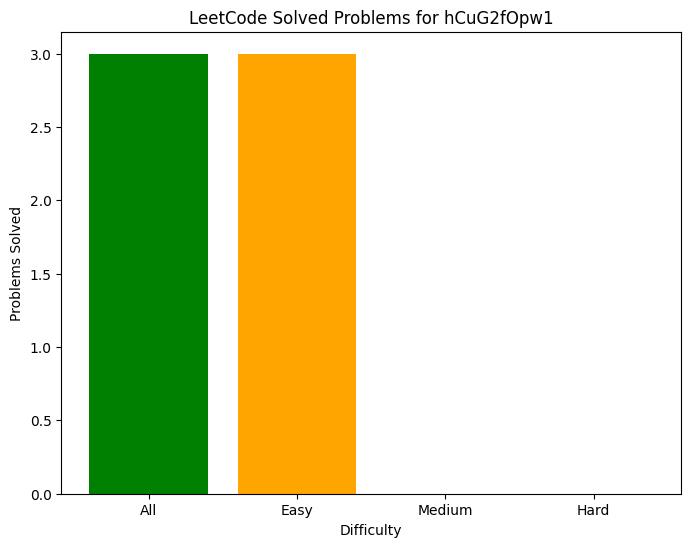

In [5]:
import requests
import matplotlib.pyplot as plt

# Replace these with your actual values
LEETCODE_SESSION = 'eyJ0eXAiOiJKV1QiLCJhbGciOiJIUzI1NiJ9.eyJfYXV0aF91c2VyX2lkIjoiMTg1MjQ2OTIiLCJfYXV0aF91c2VyX2JhY2tlbmQiOiJhbGxhdXRoLmFjY291bnQuYXV0aF9iYWNrZW5kcy5BdXRoZW50aWNhdGlvbkJhY2tlbmQiLCJfYXV0aF91c2VyX2hhc2giOiI1MDUxNWU3Njk3OTA1ZmIzZWQxOWU3ZDA1MmFmNjEzODY1M2Y2MDBiNzBiYzg0NmQ1Mjg0MmY2MDA4MmM5YzQ0Iiwic2Vzc2lvbl91dWlkIjoiMWZiMTlkODciLCJpZCI6MTg1MjQ2OTIsImVtYWlsIjoiZDI1YWltbDA3OUBjaGFydXNhdC5lZHUuaW4iLCJ1c2VybmFtZSI6ImhDdUcyZk9wdzEiLCJ1c2VyX3NsdWciOiJoQ3VHMmZPcHcxIiwiYXZhdGFyIjoiaHR0cHM6Ly9hc3NldHMubGVldGNvZGUuY29tL3VzZXJzL2hDdUcyZk9wdzEvYXZhdGFyXzE3NTMzODAyMTIucG5nIiwicmVmcmVzaGVkX2F0IjoxNzU2MzkzNjQ5LCJpcCI6IjEwMy4yMzguMTA2LjE1NiIsImlkZW50aXR5IjoiOGY2OTQ2MDliZGRjNDkwM2I4ZThmZWU1MGQ3ODNjYzEiLCJkZXZpY2Vfd2l0aF9pcCI6WyIxMTQ0MTljMTAxOTBmNzg0YzI1Y2YyOWRhZjFiNmYxOSIsIjEwMy4yMzguMTA2LjE1NiJdfQ._vor-qKeWn_wMroLxctVHSF0iem8xzJuFeZriGLwI3Y'
CSRF_TOKEN = 'OiKqsxObY5DqihGxn8CnmNsXBt00TnVoyX7cVdEidW35oMOWNdgyMyVGrlmd2RK2'

# GraphQL endpoint
url = "https://leetcode.com/graphql"

query = """
query getUserProfile($username: String!) {
  matchedUser(username: $username) {
    username
    submitStats {
      acSubmissionNum {
        difficulty
        count
        submissions
      }
    }
  }
}
"""

variables = {"username": "hCuG2fOpw1"}

headers = {
    "Content-Type": "application/json",
    "x-csrftoken": CSRF_TOKEN,
    "Cookie": f"LEETCODE_SESSION={LEETCODE_SESSION}; csrftoken={CSRF_TOKEN}",
    "Referer": "https://leetcode.com"
}

# Make the request
response = requests.post(url, json={"query": query, "variables": variables}, headers=headers)
data = response.json()

# Extract solved problem counts
user_stats = data['data']['matchedUser']['submitStats']['acSubmissionNum']
difficulties = [item['difficulty'] for item in user_stats]
counts = [item['count'] for item in user_stats]

# Plotting
plt.figure(figsize=(8,6))
plt.bar(difficulties, counts, color=['green','orange','red'])
plt.title(f"LeetCode Solved Problems for {variables['username']}")
plt.xlabel("Difficulty")
plt.ylabel("Problems Solved")
plt.show()
